<a href="https://colab.research.google.com/github/ivangn03/new/blob/master/IRIS_%D0%BA%D0%B2%D0%B0%D0%BD%D1%82%D0%BE%D0%B2%D1%96_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%96_%D0%BC%D0%B5%D1%80%D0%B5%D0%B6%D1%96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Бібліотеки

In [ ]:
!pip install --quiet qiskit qiskit_aer qiskit_algorithms qiskit_ibm_runtime
!pip install --quiet 'rivet-transpiler @ git+https://github.com/haiqu-ai/rivet.git'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.5/310.5 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.8/340.8 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 213.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.4/69.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 6.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting r

In [ ]:
%pip install pylatexenc # dependency needed for plotting
!pip install qiskit qiskit_aer qiskit_algorithms matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=ef37105563f190210fd02bb0508853d996ccfff7cd2995a496d28e593c130f7e
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [ ]:
import numpy as np
import qiskit
from qiskit.circuit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime.fake_provider import FakeMontrealV2
from qiskit_algorithms.optimizers import COBYLA
from qiskit.circuit.library import TwoLocal

from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from rivet_transpiler import transpile, transpile_right, transpile_left

# Квантова Заплутаність

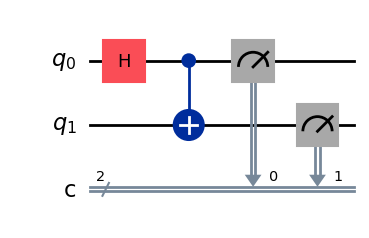

In [ ]:
# Create a quantum circuit with 2 qubits and 2 classical bits for measurement
qc = QuantumCircuit(2, 2)

# Apply Hadamard gate to the first qubit
qc.h(0)

# Apply CNOT gate with the first qubit as control and the second as target
qc.cx(0, 1)

# Measure both qubits
qc.measure([0, 1], [0, 1])

# Display the circuit
qc.draw('mpl')


Measurement Outcomes: {'00': 526, '11': 498}


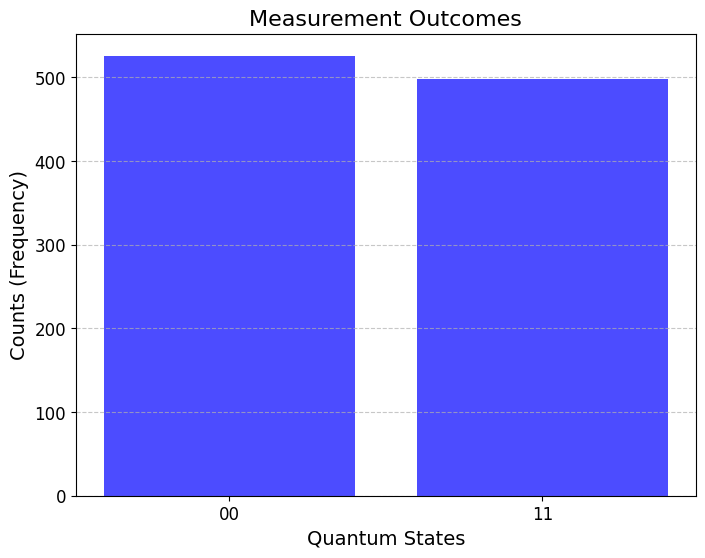

In [ ]:

# Step 5: Initialize the AerSimulator backend
backend = AerSimulator()

# Step 6: Transpile the circuit for the simulator
transpiled_qc = transpile(qc, backend)

# Step 7: Execute the transpiled circuit on the AerSimulator
result = backend.run(transpiled_qc, shots=1024).result()

# Step 8: Retrieve and print the measurement outcomes
counts = result.get_counts(transpiled_qc)
print("Вимірювання:", counts)

# Extract data for the bar chart
states = list(counts.keys())      # Quantum states
frequencies = list(counts.values())  # Measurement counts

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(states, frequencies, color='blue', alpha=0.7)
plt.title('Вимірювання', fontsize=16)
plt.xlabel('Квантовий стан', fontsize=14)
plt.ylabel('Частота (shots)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Квантова Нейронна Мережа класифікації Ірисів Фішера

In [ ]:
# Set seed for reproducibility
seed = 42
np.random.seed(seed)

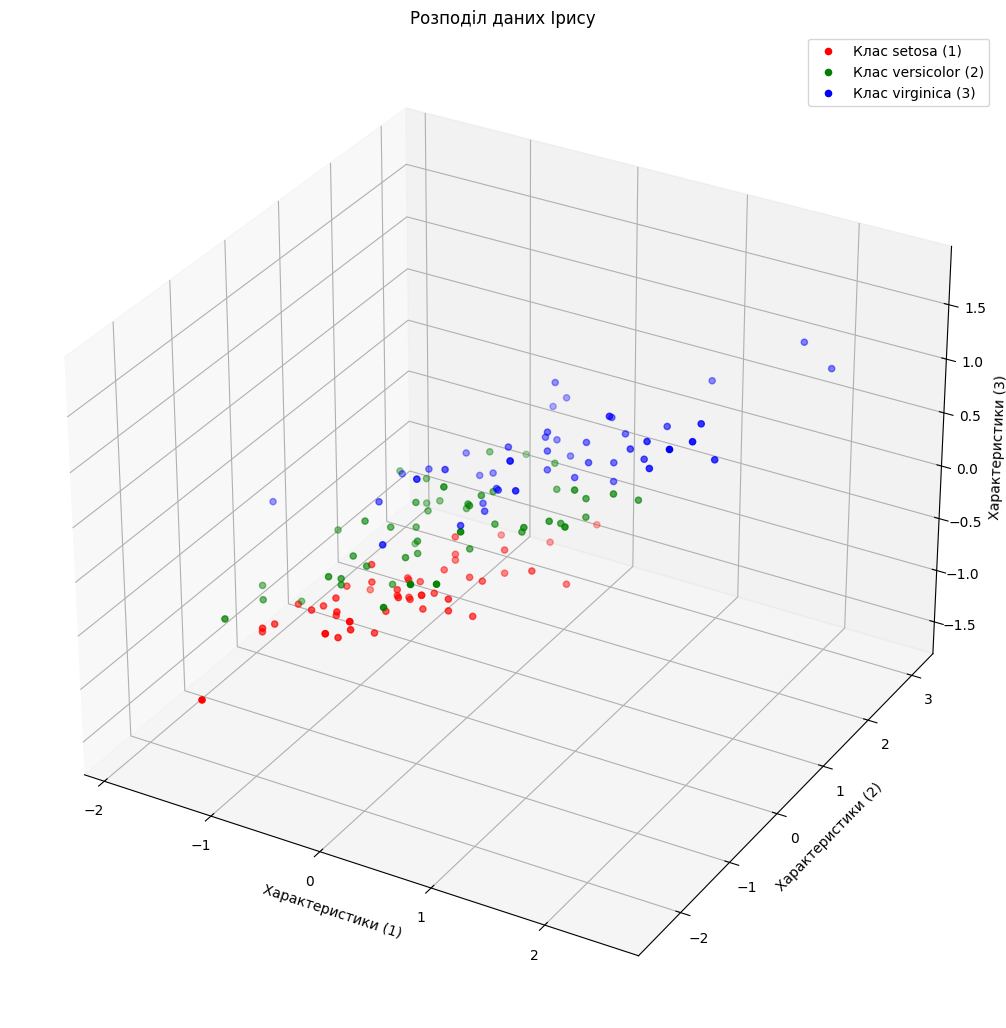

In [ ]:
# Load the Iris dataset
iris = datasets.load_iris()
data = iris.data
target = iris.target

# Filter out only three classes for multi-class classification (e.g., class 0, 1, and 2)
data = data[target != 3]
target = target[target != 3]

# Standardize the data
scaler = StandardScaler()
data = scaler.fit_transform(data)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=seed)

# Visualize the original data distribution
fig = plt.figure(figsize=(28, 28))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(data[target == 0, 0], data[target == 0, 1], data[target == 0, 2], color='r', label='Клас setosa (1)')
ax.scatter(data[target == 1, 0], data[target == 1, 1], data[target == 1, 2], color='g', label='Клас versicolor (2)')
ax.scatter(data[target == 2, 0], data[target == 2, 1], data[target == 2, 2], color='b', label='Клас virginica (3)')
ax.set_title('Розподіл даних Ірису')
ax.set_xlabel('Характеристики (1)')
ax.set_ylabel('Характеристики (2)')
ax.set_zlabel('Характеристики (3)')
ax.legend()

# Principal Component Analysis (PCA) to reduce the dimensionality
n_components = 4  # Number of qubits
pca = PCA(n_components=n_components)

x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [ ]:
# Scale the data for angle encoding
def min_max_scaling(x, new_min, new_max):
    x_min, x_max = x.min(), x.max()
    return (x - x_min) / (x_max - x_min) * (new_max - new_min) + new_min

x_train = min_max_scaling(x_train, 0, 2 * np.pi)
x_test = min_max_scaling(x_test, 0, 2 * np.pi)

In [ ]:
# Create the feature map (data encoding circuit)
n_qubits = n_components
feature_map = TwoLocal(n_qubits, ['rx'], parameter_prefix='x', reps=1, skip_final_rotation_layer=True)

# Create the variational ansatz
ansatz = TwoLocal(n_qubits, ['ry', 'rz'], 'cz', reps=1, skip_final_rotation_layer=True)

# Initialize the AerSimulator
backend = AerSimulator()

Feature Map Quantum Circuit:


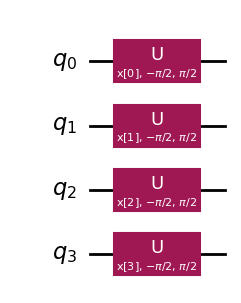

In [ ]:
# Visualize the quantum circuits
print("Feature Map Quantum Circuit:")
feature_map.decompose(reps=10).draw('mpl')

Ansatz Quantum Circuit:


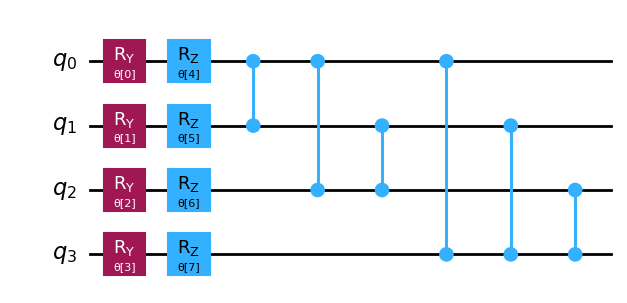

In [ ]:
print("Ansatz Quantum Circuit:")
ansatz.decompose(reps=1).draw('mpl')

In [ ]:
# Define a loss function for training
iteration = 0
global_avg_loss = 0
def compute_loss(params):
    global iteration
    global global_avg_loss
    iteration += 1
    loss = 0
    for x, y in zip(x_train, y_train):
        qc = QuantumCircuit(n_qubits)
        for i in range(n_qubits):
            qc.rx(x[i], i)
        qc.compose(ansatz.assign_parameters(params), inplace=True)
        qc.measure_all(add_bits=True)

        transpiled_qc = transpile(qc, backend)
        result = backend.run(transpiled_qc).result()
        counts = result.get_counts(transpiled_qc)

        prob_0 = counts.get('0000', 0) / 1024
        prob_1 = counts.get('1111', 0) / 1024
        prob_2 = counts.get('0010', 0) / 1024
        prob_3 = counts.get('0011', 0) / 1024

        probs = [prob_0, prob_1, prob_2, prob_3]
        # Cross-entropy loss
        loss -= np.log(probs[y] + 1e-10)

    avg_loss = loss / len(x_train)
    print(f"Iteration {iteration}: Loss = {avg_loss}")
    global_avg_loss = avg_loss
    return avg_loss

In [ ]:
# Define a prediction function
def predict(params):
    predictions = []
    for x in x_test:
        qc = QuantumCircuit(n_qubits)
        for i in range(n_qubits):
            qc.rx(x[i], i)
        qc.compose(ansatz.assign_parameters(params), inplace=True)
        qc.measure_all()

        transpiled_qc = transpile(qc, backend)
        result = backend.run(transpiled_qc).result()
        counts = result.get_counts(transpiled_qc)

        prob_0 = counts.get('0000', 0) / 1024
        prob_1 = counts.get('1111', 0) / 1024
        prob_2 = counts.get('0010', 0) / 1024
        prob_3 = counts.get('0011', 0) / 1024

        probs = [prob_0, prob_1, prob_2, prob_3]

        # Predict label
        predictions.append(np.argmax(probs))

    return np.array(predictions)

In [ ]:
# Optimize QNN
optimizer = COBYLA(maxiter=1)
initial_params = np.random.rand(ansatz.num_parameters)
optimal_params = optimizer.minimize(compute_loss, x0=initial_params).x
print(global_avg_loss)

Iteration 3: Loss = 8.888366660747554
8.888366660747554


In [ ]:
# Predict on the test set
predictions = predict(optimal_params)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 30.00%


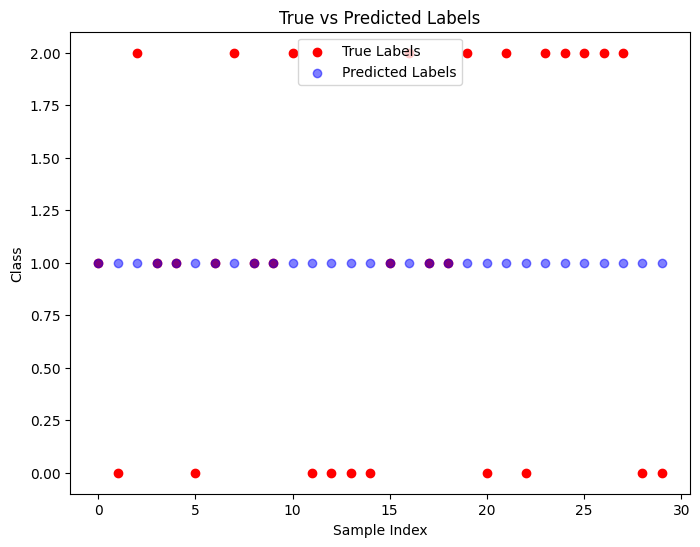

In [ ]:
# Visualize the predictions
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, color='r', label='True Labels')
plt.scatter(range(len(y_test)), predictions, color='b', label='Predicted Labels', alpha=0.5)
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.title('True vs Predicted Labels')
plt.legend()
plt.show()